Importing the libraries and tools

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Acquiring a suitable dataset presents one of the most crucial components of any data-science endeavor. We will be downloading our dataset from Kaggle. There are two datasets one for fake news and one for true news. In true news, there are 21417 news items, and in fake news, there are 23481 news items. Both datasets have a label column in which 1 stands for fake news and 0 stands for true news. We will be combining both these datasets using pandas built-in function.


In [2]:
True_news = pd.read_csv("True.csv")
Fake_news = pd.read_csv("Fake.csv")

In [3]:
True_news['label'] = 0

In [4]:
Fake_news['label'] = 1

In [5]:
True_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
Fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
dataset1 = True_news[['text','label']]
dataset2 = Fake_news[['text','label']]

In [8]:
dataset = pd.concat([dataset1 , dataset2])

In [9]:
dataset.shape

(44898, 2)

Null values

In [10]:
dataset.isnull().sum() # no null values

text     0
label    0
dtype: int64

Balanced or Unbalanced dataset

In [11]:
dataset['label'].value_counts()

1    23481
0    21417
Name: label, dtype: int64

In [12]:
dataset1.shape # true news

(21417, 2)

In [13]:
dataset2.shape # fake news

(23481, 2)

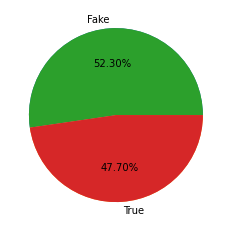

In [14]:
import matplotlib.pyplot as plt
import numpy as np

y = (23481,21417)
labels = ['Fake','True']

plt.pie(y)
plt.pie(y,labels=labels,autopct = '%0.2f%%')
plt.show() 



#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A PIE CHART

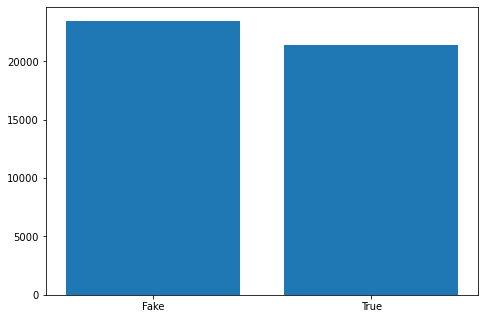

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['Fake','True']
ax.bar(title,y)
plt.show()

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A BAR CHART

Shuffle or Resample

In [16]:
dataset = dataset.sample(frac = 1)

In [17]:
dataset.head(40)

,text,label
15674,BRATISLAVA (Reuters) - The far-right People s ...,0
21532,"Besides being a muslim terrorist sympathizer, ...",1
12535,It s highly illegal and it s likely that the ...,1
13977,DUBLIN (Reuters) - Ireland s government will c...,0
8694,CLEVELAND (Reuters) - A staff writer of the Tr...,0
11375,Here s what Politico s headline today looked l...,1
13292,ABOARD A U.S. MILITARY AIRCRAFT (Reuters) - U....,0
11061,WASHINGTON (Reuters) - Former Arkansas Governo...,0
21520,The answers to questions about Donald Trump by...,1
6766,WASHINGTON (Reuters) - U.S. Senate Republican ...,0


In [18]:
import nltk

In [19]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [20]:
ps = WordNetLemmatizer()

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stopwords = stopwords.words('english')

In [23]:
# printing the stopwords in English

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
def cleaning_data(row):
    
    # convert text to into lower case
    row = row.lower() 
    
    # this line of code only take words from text and remove number and special character using RegX
    row = re.sub('[^a-zA-Z]' , ' ' , row)
    
    # split the data and make token.
    token = row.split() 
    
    # lemmatize the word and remove stop words like a, an , the , is ,are ...
    news = [ps.lemmatize(word) for word in token if not word in stopwords]  
    
    # finaly join all the token with space
    cleanned_news = ' '.join(news) 
    
    # return cleanned data
    return cleanned_news 

Lemmatization: Convert the word or token in its Base form.
Stop words: words that occur too frequently and are not considered informative

In [26]:
dataset['text'] = dataset['text'].apply(lambda x : cleaning_data(x))

In [27]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer = TfidfVectorizer(max_features = 50000 , lowercase=False , ngram_range=(1,2))

In [30]:
vectorizer

TfidfVectorizer(lowercase=False, max_features=50000, ngram_range=(1, 2))

In [31]:
dataset.shape


(44898, 2)

In [32]:
X = dataset.iloc[:35000,0]
y = dataset.iloc[:35000,1]

In [33]:
X.head()

15674    bratislava reuters far right people party slov...
21532    besides muslim terrorist sympathizer appears b...
12535    highly illegal likely owner aircraft took tax ...
13977    dublin reuters ireland government collapse opp...
8694     cleveland reuters staff writer trump organizat...
Name: text, dtype: object

In [34]:
y.head()

15674    0
21532    1
12535    1
13977    0
8694     0
Name: label, dtype: int64

The dataset must be split into two distinct sets. 80% of the data will be used to train our model and the rest 20% will serve as testing data. We train our model on the trainset and test our data on the testing set.

In [35]:
from sklearn.model_selection import train_test_split
train_data , test_data , train_label , test_label = train_test_split(X , y , test_size = 0.2 ,random_state = 0)

Fit this vectorizer on our training dataset and transform its values on the training and testing dataset with respect to the vectorizer.


After vectorizing the data it will return the sparse matrix which has to be converted into arrays for the ML algorithm.We will be using the toarray function to achieve this

In [36]:
vec_train_data = vectorizer.fit_transform(train_data)

In [37]:
vec_train_data = vec_train_data.toarray()

In [38]:
train_data.shape , test_data.shape

((28000,), (7000,))

In [39]:
vec_test_data = vectorizer.transform(test_data).toarray()

In [40]:
vec_train_data.shape , vec_test_data.shape

((28000, 50000), (7000, 50000))

In [41]:
train_label.value_counts() # balanced partition

1    14618
0    13382
Name: label, dtype: int64

In [42]:
test_label.value_counts() # balanced partition

1    3656
0    3344
Name: label, dtype: int64

In [43]:
training_data = pd.DataFrame(vec_train_data , columns=vectorizer.get_feature_names())
testing_data = pd.DataFrame(vec_test_data , columns= vectorizer.get_feature_names())

First we have to fit the classifier on our vectorized train data then when the classifier has fitted successfully on the training set then we can use the predict method to predict the result on the test set.

In [44]:
#IMPORTING LOGISTIC REGRESSION 

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(training_data, train_label)
y_pred  = model.predict(testing_data)

In [48]:
pd.Series(y_pred).value_counts()

1    3644
0    3356
dtype: int64

In [49]:
test_label.value_counts()

1    3656
0    3344
Name: label, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score,classification_report

In [51]:
print(classification_report(test_label , y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3344
           1       0.99      0.99      0.99      3656

    accuracy                           0.99      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [52]:
y_pred_train = model.predict(training_data)
print(classification_report(train_label , y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13382
           1       0.99      0.99      0.99     14618

    accuracy                           0.99     28000
   macro avg       0.99      0.99      0.99     28000
weighted avg       0.99      0.99      0.99     28000



In [53]:
accuracy_score(train_label , y_pred_train)

0.9924285714285714

In [54]:
accuracy_score(test_label , y_pred)

0.988

In [55]:
lr_acc = accuracy_score(test_label , y_pred)

In [56]:
lr_acc_train=accuracy_score(train_label , y_pred_train) #accuracy of trained data

In [57]:
lr_acc_test=accuracy_score(test_label , y_pred) #accuracy of test data

In [58]:
print(lr_acc_test,lr_acc_train) #printing the accuracy values

0.988 0.9924285714285714


In [59]:
print(f'Accuracy of training data: {round(lr_acc_train*100,2)}%')
print(f'Accuracy of testing data: {round(lr_acc_test*100,2)}%')

Accuracy of training data: 99.24%
Accuracy of testing data: 98.8%


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [61]:
lr_cf_test=confusion_matrix(test_label , y_pred)

In [62]:
lr_cf_train = confusion_matrix(train_label , y_pred_train)

In [63]:
print(lr_cf_test)
print(lr_cf_train)

[[3308   36]
 [  48 3608]]
[[13297    85]
 [  127 14491]]


In [64]:
lis3 = lr_cf_test.tolist() #convert test array to list
lis4 = lr_cf_train.tolist() #convert train array to list

In [65]:
lr_cf_test_list=[lis3[0][0],lis3[0][1],lis3[1][0],lis3[1][1]]
lr_cf_train_list=[lis4[0][0],lis4[0][1],lis4[1][0],lis4[1][1]]

In [66]:
print(lr_cf_test_list)
print(lr_cf_train_list)

[3308, 36, 48, 3608]
[13297, 85, 127, 14491]


true positives - false news that is correctly false

false positives - false news that is incorrectly true

true negatives - True news that is correctly true

false negatives - True news that is incorrectly false

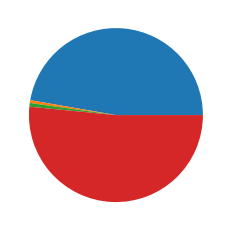

In [67]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(lr_cf_test_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TEST DATA CONFUSION MATRIX IN A PIE CHART
#BLUE - true positives RED - false negatives ORANGE - false positives GREEN - true negatives

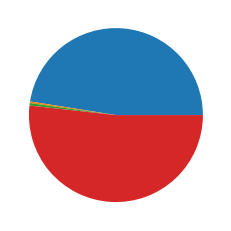

In [68]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(lr_cf_train_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A PIE CHART

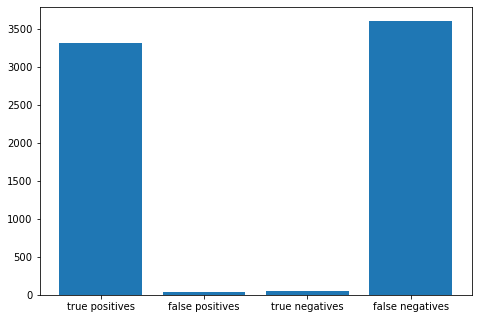

In [69]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,lr_cf_test_list)
plt.show()

#PLOTTING THE TEST DATA CONFUSION MATRIX IN A BAR CHART

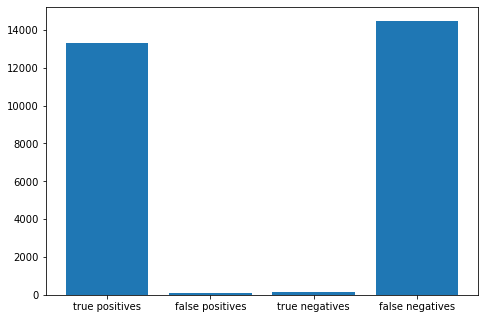

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,lr_cf_train_list)
plt.show()

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A BAR CHART

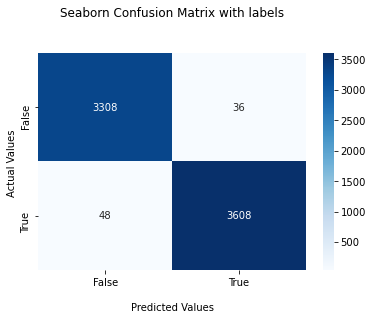

In [71]:
import seaborn as sns

ax = sns.heatmap(lr_cf_test, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TEST DATA
#LR

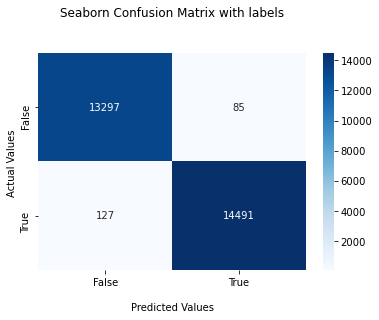

In [72]:
import seaborn as sns

ax = sns.heatmap(lr_cf_train, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TRAINED DATA

In [73]:
accuracy_final = [lr_acc_test,lr_acc_train] #list of accuracy scores of test data and train data

In [74]:
#TRAIN DATA

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(train_label , y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9924801325619828

In [75]:
#TEST DATA

from sklearn.metrics import roc_curve, auc
fpr, tpr, t = roc_curve(test_label , y_pred)
roc_auc = auc(fpr, tpr)
roc_auc


0.9880526734580634

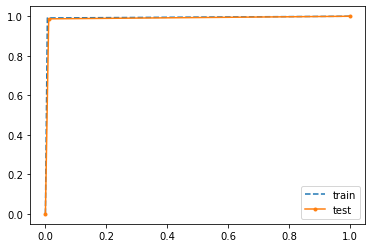

In [76]:
from matplotlib import pyplot

pyplot.plot(false_positive_rate, true_positive_rate, linestyle='--',label="train")
pyplot.plot(fpr, tpr, marker='.',label="test")

pyplot.xlabel('')
pyplot.ylabel('')

pyplot.legend()

pyplot.show()

#ANOTHER COMPARISON BETWEEN TEST ACCURACY AND TRAIN ACCURACY

In [77]:
#predict if news is fake by providing str test string input

In [78]:
news = cleaning_data(str("Imposters posing as army personnel on the social media have been called out by the Indian Army as false news and disinformation."))

In [79]:
single_prediction = model.predict(vectorizer.transform([news]).toarray())
single_prediction

array([1], dtype=int64)

In [80]:
#IMPPORTING MNB

In [81]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
from sklearn.metrics import accuracy_score,classification_report

In [83]:
clf = MultinomialNB()

In [84]:
clf.fit(training_data, train_label)
y_pred  = clf.predict(testing_data)

In [85]:
pd.Series(y_pred).value_counts()

1    3690
0    3310
dtype: int64

In [86]:
test_label.value_counts()

1    3656
0    3344
Name: label, dtype: int64

In [87]:
#implemented the model,onto accuracy checks etc

Now predict on both train set

In [88]:
print(classification_report(test_label , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3344
           1       0.95      0.96      0.96      3656

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000



In [89]:
y_pred_train = clf.predict(training_data)
print(classification_report(train_label , y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13382
           1       0.96      0.96      0.96     14618

    accuracy                           0.96     28000
   macro avg       0.96      0.96      0.96     28000
weighted avg       0.96      0.96      0.96     28000



In [90]:
accuracy_score(train_label , y_pred_train)

0.9585357142857143

In [91]:
accuracy_score(test_label , y_pred)

0.9534285714285714

In [92]:
mnb_acc = accuracy_score(test_label , y_pred)

In [93]:
mnb_acc

0.9534285714285714

As We can see above we have a very good score of precision, recall and f1 score. Our model has performed very well on unseen data. The accuracy score on test dataset is 95% which is great. Our accuracy on the training set is almost 96% which is also very good. Our model has performed well.

In [94]:
#predict if news is fake by providing str test string input

In [95]:
news = cleaning_data(str("Imposters posing as army personnel on the social media have been called out by the Indian Army as false news and disinformation."))

In [96]:
single_prediction = clf.predict(vectorizer.transform([news]).toarray())
single_prediction

array([0], dtype=int64)

In [97]:
acc_train=accuracy_score(train_label , y_pred_train) #accuracy of trained data

In [98]:
acc_test=accuracy_score(test_label , y_pred) #accuracy of test data

In [99]:
print(acc_test,acc_train) #printing the accuracy values

0.9534285714285714 0.9585357142857143


In [100]:
print(f'Accuracy of training data: {round(acc_train*100,2)}%')
print(f'Accuracy of testing data: {round(acc_test*100,2)}%')

Accuracy of training data: 95.85%
Accuracy of testing data: 95.34%


In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [102]:
confusion_matrix(test_label , y_pred)

array([[3164,  180],
       [ 146, 3510]], dtype=int64)

In [103]:
cf_test=confusion_matrix(test_label , y_pred)

In [104]:
confusion_matrix(train_label , y_pred_train)

array([[12783,   599],
       [  562, 14056]], dtype=int64)

In [105]:
cf_train = confusion_matrix(train_label , y_pred_train)

In [106]:
print(cf_test)
print(cf_train)

[[3164  180]
 [ 146 3510]]
[[12783   599]
 [  562 14056]]


On Test data:

Our model successfully predicted 3207 true positives

Our model successfully predicted 3510 true negatives

Our model predicted 180 false positives

Our model predicted 146 false negatives

On Train data:

Our model successfully predicted 12783 true positives

Our model successfully predicted 14056 true negatives

Our model predicted 599 false positives

Our model predicted 562 false negatives


In [107]:
lis1 = cf_test.tolist() #convert test array to list
lis2 = cf_train.tolist() #convert train array to list

In [108]:
cf_test_list=[lis1[0][0],lis1[0][1],lis1[1][0],lis1[1][1]]
cf_train_list=[lis2[0][0],lis2[0][1],lis2[1][0],lis2[1][1]]

In [109]:
print(cf_test_list)
print(cf_train_list)

[3164, 180, 146, 3510]
[12783, 599, 562, 14056]


true positives - false news that is correctly false

false positives - false news that is incorrectly true

true negatives - True news that is correctly true

false negatives - True news that is incorrectly false


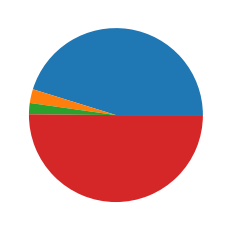

In [110]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(cf_test_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TEST DATA CONFUSION MATRIX IN A PIE CHART
#BLUE - true positives RED - false negatives ORANGE - false positives GREEN - true negatives

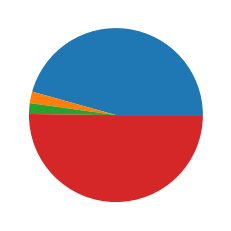

In [111]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(cf_train_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A PIE CHART

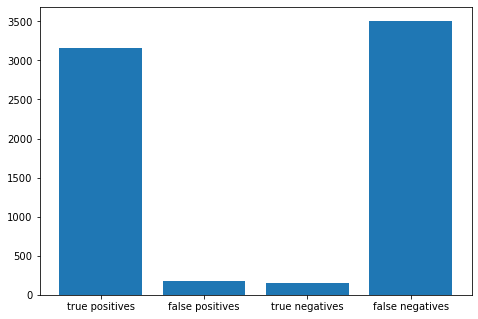

In [112]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,cf_test_list)
plt.show()

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A BAR CHART

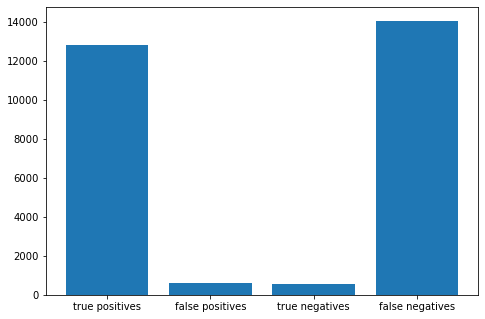

In [113]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,cf_train_list)
plt.show()

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A BAR CHART

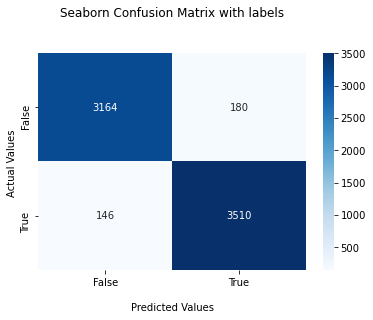

In [114]:
import seaborn as sns

ax = sns.heatmap(cf_test, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TEST DATA
#MNB

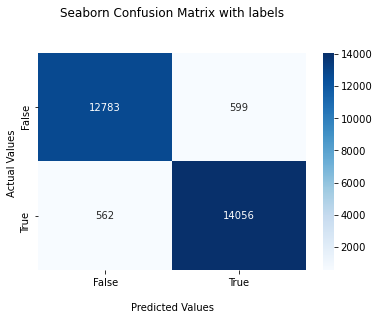

In [115]:
import seaborn as sns

ax = sns.heatmap(cf_train, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TRAINED DATA

In [116]:
accuracy_final = [acc_test,acc_train] #list of accuracy scores of test data and train data

In [117]:

#TRAIN DATA

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(train_label , y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.9583963140502414

In [118]:
#TEST DATA

from sklearn.metrics import roc_curve, auc
fpr, tpr, t = roc_curve(test_label , y_pred)
roc_auc = auc(fpr, tpr)
roc_auc



0.9531189471590255

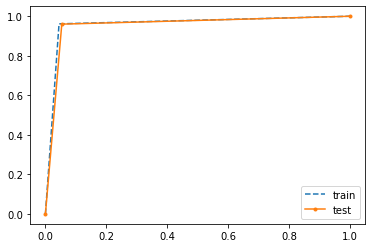

In [119]:
from matplotlib import pyplot

pyplot.plot(false_positive_rate, true_positive_rate, linestyle='--',label="train")
pyplot.plot(fpr, tpr, marker='.',label="test")

pyplot.xlabel('')
pyplot.ylabel('')

pyplot.legend()

pyplot.show()

#ANOTHER COMPARISON BETWEEN TEST ACCURACY AND TRAIN ACCURACY

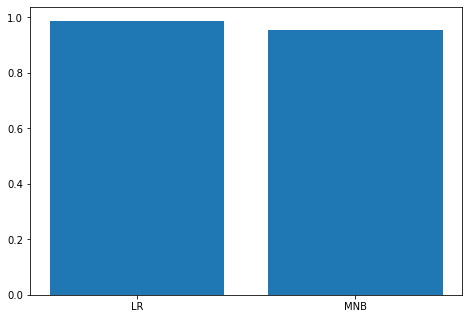

In [120]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['LR','MNB']
accuracy_final = [lr_acc,mnb_acc]
ax.bar(title,accuracy_final)
plt.show()

#comparison graph of difference in accuracy between different classifiers

We can save our model to use it directly when required.

In [121]:
import joblib

In [122]:
joblib.dump(clf,'model.pkl')

['model.pkl']

In [123]:
model=joblib.load('model.pkl')


We will be implementing multiple classifiers and comparing their accuracies to find the most accurate one to tackle the huge spread of fake news acrosss social media channels.It is essential that such models are further advanced in order to effectively combat misinformation in these difficult times.
